<a href="https://colab.research.google.com/github/NishaB65/Digit-Recognition/blob/main/Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Digit Recognition**

In [3]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

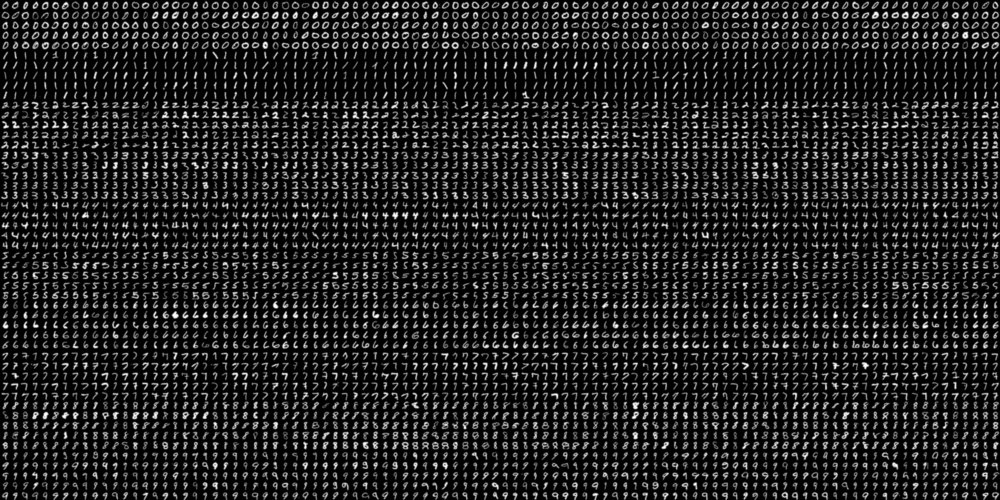

Resulting Shape (50, 100, 20, 20)
input shapes
-->Train: (3500, 400), Test: (1500, 400)
target shapes
-->Train: (3500, 1), Test: (1500, 1)
Accuracy:  93.46666666666667


In [4]:
# Loading the digits data
data = cv2.imread('digits.png')
gray = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)
# Resizing each digit from 20x20 to 10x10
resized = cv2.pyrDown(gray)

cv2_imshow(resized)

# Splitting original image into 5000 different arrays of size 20x20
# Resulting array: 50 * 100 * 20 * 20

arr = [np.hsplit(i, 100) for i in np.vsplit(gray, 50)]
arr = np.array(arr)
print ("Resulting Shape", arr.shape)

# Spliting into training and test set
# Total: 5000, Train: 3500 images, Test: 1500
X_train = arr[:, :70].reshape(-1, 400).astype(np.float32)
X_test = arr[:, 70:100].reshape(-1, 400).astype(np.float32)
print ("input shapes\n-->Train: {}, Test: {}".format(X_train.shape, X_test.shape))

# Targets for each image
y = [0,1,2,3,4,5,6,7,8,9]

y_train = np.repeat(y, 350)[:, np.newaxis]
y_test = np.repeat(y, 150)[:, np.newaxis] 
print ("target shapes\n-->Train: {}, Test: {}".format(y_train.shape, y_test.shape))

# Using K-NN(k- nearest neighbors) as the ML algorithm
classifier_knn = cv2.ml.KNearest_create()
classifier_knn.train(X_train, cv2.ml.ROW_SAMPLE, y_train)
response, result, neighbours, distance = classifier_knn.findNearest(X_test, k=3)

# Testing and calculating the accuracy of knn classifier
correct = result == y_test
correct = np.count_nonzero(correct)
accuracy = correct * (100.0/result.size)
print ("Accuracy: ", accuracy)
cv2.waitKey(0)
cv2.destroyAllWindows()